In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
log_train = pd.read_csv('train_joined.csv')
log_test = pd.read_csv('test_joined.csv')
log_test.drop('instanceID', axis=1, inplace=True)
log = log_train.append(log_test, ignore_index=True)
log['instanceID'] = range(log.shape[0])
app_cate = pd.read_csv('pre/app_categories.csv')

In [3]:
actions = pd.read_csv('pre/user_app_actions.csv')
tmp = actions.installTime.map(lambda z: int(str(z)[:2]) if len(str(z))>5 else int(str(z)[:1]))
actions['installDay'] = tmp
actions_before_log = actions[actions.installDay<17]

In [4]:
print(actions_before_log.head())

    userID  installTime  appID  installDay
1        5       141354    589          14
10      12        61456    589           6
11      12        61630    536           6
12      12        71022   1014           7
13      12        81312   1032           8


## User installation count

In [5]:
actions_cates = pd.merge(actions_before_log, app_cate, how='left', on='appID')
actions_cates = actions_cates.loc[:, ['userID', 'appCategory']]
actions_cates = actions_cates.groupby(actions_cates.columns.tolist()).size().reset_index().rename(columns={0:'count'}).astype(int)
print(actions_cates.shape)

actions_cates = actions_cates.pivot(index='userID',columns='appCategory',values='count').fillna(0)
actions_cates.reset_index(level=['userID'], inplace=True)
print(actions_cates.head())

(2162674, 3)
appCategory  userID    0    1    2  103  104  105  106  108  109 ...   303  \
0                 5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0   
1                12  1.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0  1.0 ...   0.0   
2                14  4.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0 ...   0.0   
3                19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0   
4                20  7.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   

appCategory  401   402  403  405  406  407  408  409  503  
0            0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1            1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2            0.0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
3            0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4            0.0  12.0  0.0  0.0  0.0  1.0  2.0  1.0  3.0  

[5 rows x 28 columns]


In [6]:
actions_cates['total'] = actions_cates.iloc[:, 1:].sum(axis=1, numeric_only=True)
print(actions_cates.head())

appCategory  userID    0    1    2  103  104  105  106  108  109  ...    401  \
0                 5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...    0.0   
1                12  1.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0  1.0  ...    1.0   
2                14  4.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  ...    0.0   
3                19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...    0.0   
4                20  7.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...    0.0   

appCategory   402  403  405  406  407  408  409  503  total  
0             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0  
1             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    6.0  
2             0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0    7.0  
3             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0  
4            12.0  0.0  0.0  0.0  1.0  2.0  1.0  3.0   37.0  

[5 rows x 29 columns]


In [32]:
stats = 407

In [33]:
actions_cates['actions_before_17th_log{}'.format(stats)] = np.floor(np.log(actions_cates[stats]+1))

0.0    585582
1.0     13120
2.0       153
3.0         1
Name: actions_before_17th_log407, dtype: int64


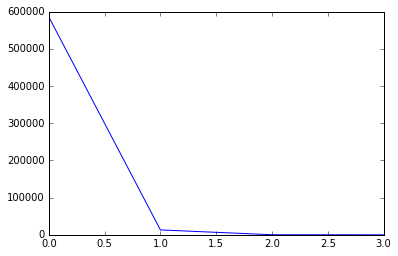

In [34]:
distribute = actions_cates['actions_before_17th_log{}'.format(stats)].value_counts().sort_index()
print(distribute)
plt.plot(distribute.index, distribute.values)
plt.show()

In [35]:
log_tmp = pd.merge(log, actions_cates.loc[:, ['userID', 'actions_before_17th_log{}'.format(stats)]], on='userID', how='left')
log_tmp.fillna(7, inplace=True)
log_tmp['actions_before_17th_log{}'.format(stats)] = log_tmp['actions_before_17th_log{}'.format(stats)].astype(int)

In [36]:
print(log_tmp.groupby('actions_before_17th_log{}'.format(stats))['label'].value_counts())

actions_before_17th_log407  label
0                            0        758130
                            -1         68998
                             1         26018
1                            0         17783
                            -1          1515
                             1           668
2                            0           221
                            -1            13
                             1             7
3                            0             1
7                            0       2880131
                            -1        267963
                             1         66569
Name: label, dtype: int64


In [37]:
print(log_tmp.groupby('appCategory')['label'].value_counts())

appCategory  label
0             0            87
              1            64
2             0        471319
             -1         34949
              1          7414
101           0         28347
              1           891
             -1           124
104           0        414983
             -1         33625
              1         15019
106           0           214
              1            10
108           0        209842
             -1         18849
              1          1466
201           0        304286
             -1         38471
              1          9896
203           0         13862
              1          1482
209           0       1877684
             -1        139522
              1         38962
301           0         44262
             -1          6434
              1          1277
402           0        206253
             -1         16757
              1          8051
407           0         26567
              1          6797
             -1      

## Apps installed count

In [38]:
log_apps = log['appID'].unique()
print("Number of click logs items: {}".format(log.shape[0]))
print("Number of apps in click logs: {}".format(log_apps.shape[0]))

Number of click logs items: 4088017
Number of apps in click logs: 50


In [45]:
apps_user = actions_before_log[actions_before_log.appID.isin(log_apps)].groupby('appID')
print(apps_user.count())

       userID  installTime  installDay
appID                                 
356      1592         1592        1592
360     39238        39238       39238
383     10453        10453       10453
389      1993         1993        1993
391      2922         2922        2922
419         2            2           2
420      1586         1586        1586
421       574          574         574
428       924          924         924
434       244          244         244
442         3            3           3
465      8691         8691        8691


In [46]:
tmp = np.floor(np.log(apps_user.count()))
tmp.drop(['installTime','installDay'], axis=1, inplace=True)
tmp.columns.values[0] = 'actions_app_installed_count'
print(tmp)

       actions_app_installed_count
appID                             
356                            7.0
360                           10.0
383                            9.0
389                            7.0
391                            7.0
419                            0.0
420                            7.0
421                            6.0
428                            6.0
434                            5.0
442                            1.0
465                            9.0


In [47]:
log_tmp1 = pd.merge(log_tmp, tmp.reset_index(level=0), on='appID', how='left')
log_tmp1.fillna(0, inplace=True)
log_tmp1['actions_app_installed_count'] = log_tmp1['actions_app_installed_count'].astype(int)

In [48]:
print(log_tmp1.groupby('actions_app_installed_count')['label'].value_counts())

actions_app_installed_count  label
0                             0        796262
                             -1         54743
                              1         21167
1                            -1          1904
                              0          1070
                              1             3
5                             0         71954
                             -1          4389
                              1            66
6                             0        172237
                             -1         17124
                              1          9032
7                             0        246188
                             -1         67575
                              1          7440
9                             0       2064269
                             -1        154283
                              1         45658
10                            0        304286
                             -1         38471
                              1          9896

## App Category installed count

In [49]:
log_appcates = log['appCategory'].unique() 
print(log_appcates)
cates_actioned = pd.merge(actions_before_log, app_cate, how='left', on='appID')
appcates_user = cates_actioned[cates_actioned['appCategory'].isin(log_appcates)].groupby('appCategory')
print(appcates_user.count())
""" Category 101 is not in installed app-category
"""

[108   2 209 201 402 104 301 101 203 408 106 503   0 407]
             userID  installTime   appID  installDay
appCategory                                         
0            729657       729657  729657      729657
2             30166        30166   30166       30166
104          210009       210009  210009      210009
106          263944       263944  263944      263944
108           89753        89753   89753       89753
201          182129       182129  182129      182129
203          194649       194649  194649      194649
209          134187       134187  134187      134187
301          144947       144947  144947      144947
402          172053       172053  172053      172053
407           90848        90848   90848       90848
408           80910        80910   80910       80910
503          403555       403555  403555      403555


' Category 101 is not in installed app-category\n'

In [51]:
tmp2 = np.floor(np.log(appcates_user.count())).astype(int)
tmp2.drop(['appID', 'installTime', 'installDay'], axis=1, inplace=True)
tmp2.columns.values[0] = 'actions_appcate_installed_count'
print(tmp2)

             actions_appcate_installed_count
appCategory                                 
0                                         13
2                                         10
104                                       12
106                                       12
108                                       11
201                                       12
203                                       12
209                                       11
301                                       11
402                                       12
407                                       11
408                                       11
503                                       12


In [52]:
log_tmp2 = pd.merge(log_tmp1, tmp2.reset_index(level=0), on='appCategory', how='left')
log_tmp2.fillna(0, inplace=True)
log_tmp2['actions_appcate_installed_count'] = log_tmp2['actions_appcate_installed_count'].astype(int)

In [53]:
print(log_tmp2.groupby('actions_appcate_installed_count')['label'].value_counts())

actions_appcate_installed_count  label
0                                 0         28347
                                  1           891
                                 -1           124
10                                0        471319
                                 -1         34949
                                  1          7414
11                                0       2158418
                                 -1        167351
                                  1         48502
12                                0        998095
                                 -1        136065
                                  1         36391
13                                0            87
                                  1            64
Name: label, dtype: int64


## daily installation tags

In [60]:
days = log['clickTime'].map(lambda z: int(str(z)[:2]))
log['installDay'] = days
print(log['installDay'].head())

0    17
1    17
2    17
3    17
4    17
Name: installDay, dtype: int64


In [85]:
res = np.empty(0)
for day in log['installDay'].unique():
    actions_timewindow = actions[(actions['installDay']<day) & \
                                 (actions['installDay']>=day-1)]
    log_timewindow = log[log['installDay']==day]
    temp = actions_timewindow.loc[:, ['installDay','userID','appID']]
    temp1 = log_timewindow.loc[:, ['installDay','userID','appID']]
    temp2 = temp.append(temp1)
    df = temp2[temp2.duplicated(['userID','appID'])]
    res = np.append(res, df[df['installDay']==day].index.values)
    # print(res)
res = res.astype(int)
print(res)
print(res.shape)

[     72      96     179 ..., 4087978 4087987 4088000]
(466312,)


In [86]:
log_tmp2.loc[res, 'actions_installed_1day_ago'] = 1
log_tmp2.fillna(0, inplace=True)

In [87]:
print(log_tmp2.groupby('actions_installed_1day_ago')['label'].value_counts())

actions_installed_1day_ago  label
0.0                          0       3228985
                            -1        303997
                             1         88723
1.0                          0        427281
                            -1         34492
                             1          4539
Name: label, dtype: int64


## Concatenate to csv

In [92]:
tobeMerged = [
    #'actions_before_17th_log{}'.format(stats),
    #'actions_app_installed_count',
    #'actions_appcate_installed_count',
    'actions_installed_1day_ago'
]

In [93]:
train = pd.read_csv("train_joined_hash2.csv", dtype=str)
train.fillna('', inplace=True)
print(train.index)
print(log_tmp2.index)
for m in tobeMerged:
    train[m] = log_tmp2.iloc[:3749528][m].values.astype(int)
    # print(np.any(np.isnan(train[m])))
train.to_csv('train_joined_hash5.csv', index=False)

RangeIndex(start=0, stop=3749528, step=1)
Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            4088007, 4088008, 4088009, 4088010, 4088011, 4088012, 4088013,
            4088014, 4088015, 4088016],
           dtype='int64', length=4088017)


In [94]:
train = pd.read_csv("all_joined_hash2.csv", dtype=str)
train.fillna('', inplace=True)
for m in tobeMerged:
    train[m] = log_tmp2[m].values.astype(int)
train.to_csv('all_joined_hash5.csv', index=False)